In [34]:
from sympy import *
from sympy.stats import *

init_printing() 
%matplotlib inline



In [35]:
T = Normal('T', 30, 3)
print "P(T>33) = ", P(T>33, evaluate=False)
print "        = ", P(T>33)
print "        = ", P(T>33).evalf()

P(T>33) =  Integral(sqrt(2)*exp(-(_z - 30)**2/18)/(6*sqrt(pi)), (_z, 33, oo))
        =  sqrt(2)*(-sqrt(2)*sqrt(pi)*erf(sqrt(2)/2) + sqrt(2)*sqrt(pi))/(4*sqrt(pi))
        =  0.158655253931457


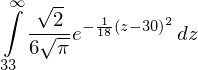

In [36]:

P(T>33, evaluate=False)

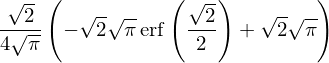

In [37]:
P(T>33)

In [38]:
P(T>33).evalf()

In [39]:
noise = Normal('eta', 0, 1.5)
observation = T + noise



In [40]:
observation

In [41]:
T_posterior = given(T, Eq(observation, 26))
T_posterior

In [32]:
P(T_posterior>33)

In [42]:


x = Symbol('x')
print "density(T given T+noise==26) = ", density(T_posterior)(x)

density(T given T+noise==26) =  2.06993298891632e-22*exp(50)*exp(-0.222222222222222*(-x + 26)**2)*exp(-(x - 30)**2/18)/sqrt(pi)


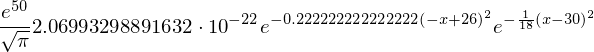

In [43]:
density(T_posterior)(x)

ValueError: The arguments must be Symbols.

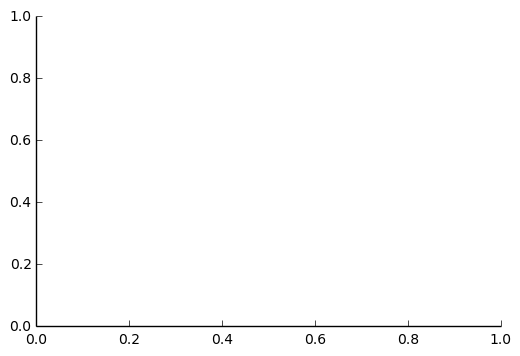

In [65]:
plot(density(T_posterior)(x),density(T)(x) ,(x, 20, 39)  )


In [52]:
# Symbols for position, velocity, angle, time, and gravity
x0, y0, yf, v, theta, t, g = symbols ('x0, y0, yf, v, theta, t, g')
# x and y positions as a function of time
x = x0 + v * cos(theta) * t
y = y0 + v * sin(theta) * t + g/2*t**2
# Solve y = yf for time to obtain the duration of the flight
t_impact = solve (y - yf, t)[1]
# Final x value of cannonball on impact
xf = x0 + v * cos(theta) * t_impact

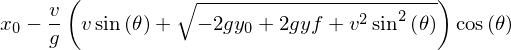

In [53]:
xf

In [54]:
# Substitute out symbolic variables in xf for numeric values
xf_num = xf.subs ({g:-9.8, v:10, theta:pi/4, x0:0, y0:10, yf:0})

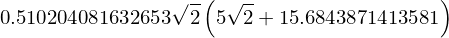

In [55]:
xf_num

In [56]:
xf_num.evalf()

In [23]:
x0 = 0
y0 = 0
yf = -30 # target is 30 meters below
g = -10 # gravitational constant
v = 30 # m/s
theta = pi/4

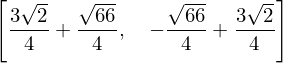

In [27]:
t = Symbol('t') # SymPy variable for time
x = x0 + v * cos(theta) * t
y = y0 + v * sin(theta) * t + g*t**2
impact_time = solve(y - yf, t)
impact_time

In [28]:
xf = x0 + v * cos(theta) * impact_time[0]
xf.evalf() # evaluate xf numerically



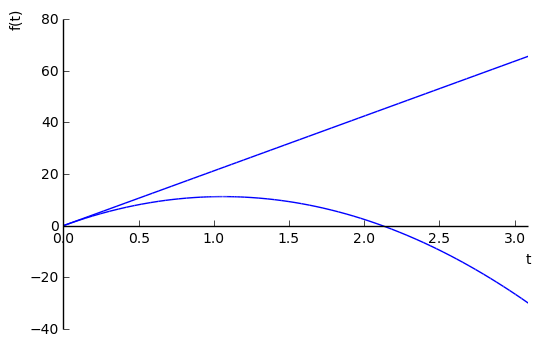

In [30]:
# Plot x vs. y for t in (0, impact_time)
plot(x, y, (t, 0, impact_time[0]))

In [31]:
x0 = Symbol('x_0')
y0 = Symbol('y_0')
yf = Symbol('y_f')
g = Symbol('g')
v = Symbol('v')
theta = Symbol('theta')

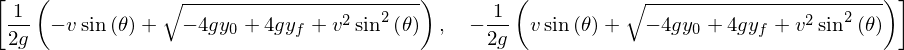

In [32]:
t = Symbol('t') # SymPy variable for time
x = x0 + v * cos(theta) * t
y = y0 + v * sin(theta) * t + g*t**2
impact_time = solve(y - yf, t)
impact_time

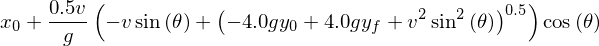

In [33]:
xf = x0 + v * cos(theta) * impact_time[0]
xf.evalf() # evaluate xf numerically

## Motivating Example - Uncertainty Modeling



P -- # Probability
E -- # Expectation
variance -- # Variance
density -- # Probability density function
sample -- # A random sample





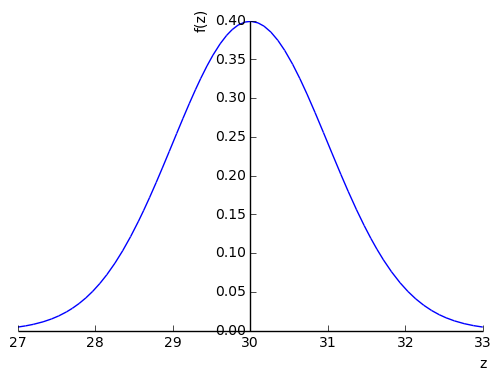

In [16]:
from sympy.stats import *
v = Normal('v', 30, 1)
pdf = density(v)
z = Symbol('z')
plot(pdf(z), (z, 27, 33) )

SyntaxError: invalid syntax (<ipython-input-34-f2e09647e29e>, line 1)

In [10]:
E(Die('X', 6))

In [16]:
X = Die('X', 6)
Y = Die('Y', 6)
print "P(X>3)   = ", P(X>3)
print "E(X+Y)   = ", E(X+Y)
print "E(2*X)   = ", E(2*X)
print "variance(X+3) = ", variance(X+3)

density_map = {'heads': .5, 'tails':.5}
coin = FiniteRV('coin', density_map)
print "Density(coin) = ", density(coin)

P(X>3)   =  1/2
E(X+Y)   =  7
E(2*X)   =  7
variance(X+3) =  35/12
Density(coin) =  FiniteDistributionHandmade({heads: 0.5, tails: 0.5})


In [17]:
mod_X = X + 3

In [18]:
A = X > 3

B = X + Y >= 10 
P(B, A) == P(A, B)* P(B)/P(A)

True

In [21]:
density = {'heads':.5, 'tails':.5}
coin = FiniteRV(density)

TypeError: FiniteRV() takes exactly 2 arguments (1 given)

In [36]:
# Symbols for position, velocity, angle, time, gravity
x0, y0, yf, v, theta, t, g = symbols('x0 y0 y_f v theta t g')
# x and y positions as a function of time
x = x0 + v*cos(theta)*t
y = y0 + v*sin(theta)*t + g/2*t**2
# Solve y = yf for time to obtain the duration of the flight
t_impact = solve(y-yf, t)[1]
# Final x value of cannon ball on impact
xf = x0 + v*cos(theta)*t_impact

print "\n\nsymbolic xf = ", xf

xf_num = xf.subs({g: -Rational(98,10), v: 10, theta: pi/4, x0: 0, y0: 10,
                  yf: 0})



symbolic xf =  x0 - v*(v*sin(theta) + sqrt(-2*g*y0 + 2*g*y_f + v**2*sin(theta)**2))*cos(theta)/g


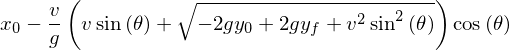

In [37]:
xf

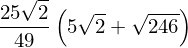

In [38]:
xf_num

In [39]:
xf_num.evalf()

## Adding Uncertainty

In [57]:
# 4.1
y0_uncertain = Normal('y0', 10,1)
xf_uncertain = xf.subs({g: -Rational(98,10), v: 10, theta: pi/4, x0: 0,
                        y0: y0_uncertain, yf: 0})

print "\n\nexpecatation and variance of xf when y0 is uncertain"
print "E(xf)   = ", E(xf_uncertain, evaluate=False)
print "        = ", E(xf_uncertain).evalf()
print "Var(xf) = ", variance(xf_uncertain).evalf()



expecatation and variance of xf when y0 is uncertain
E(xf)   =  Integral(25*(sqrt(98*y0/5 + 50) + 5*sqrt(2))*exp(-(y0 - 10)**2/2)/(49*sqrt(pi)), (y0, -oo, oo))
        =  16.4098803993481 + 1.55938739200359e-36*I
Var(xf) =  0.204400782642116 + 14.9244819704958*I


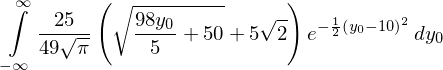

In [41]:
E(xf_uncertain, evaluate=False)

In [42]:
E(xf_uncertain).evalf()

In [43]:
variance(xf_uncertain).evalf()

## Dealing with Complexity

In [58]:
# 4.2
v_uncertain = Uniform('v', 9, 11.5)
theta_uncertain = Normal('theta', pi/4, pi/20)
xf_uncertain = xf.subs({g: -Rational(98,10), v: v_uncertain,
                        theta: theta_uncertain, x0: 0, y0: y0_uncertain, yf: 0})



print "\n\nComplex probability"
print "P(theta>pi/4 given xu>16) = ", P(theta_uncertain>pi/4, xf_uncertain>16, numsamples=1000)




Complex probability
P(theta>pi/4 given xu>16) =  0.349000000000000


Our queries might also become
more complex, such as, “What’s the probability that theta was greater than π/4 given that the ball landed past xf > 16?”, P (θ > π/4 | xf > 16). Asking this question in SymPy is just as easy as the example above:

In [59]:
P(theta_uncertain>pi/4, xf_uncertain>16, numsamples=1000)

In [60]:
n= 10
k=5

In [61]:
mu = MatrixSymbol('mu', n, 1) # n by 1 mean vector
Sigma = MatrixSymbol('Sigma', n, n) # covariance matrix


In [62]:
X = MVNormal('X', mu, Sigma)
H = MatrixSymbol('H', k, n) # An observation operator
data = MatrixSymbol('data', k, 1)

NameError: name 'MVNormal' is not defined

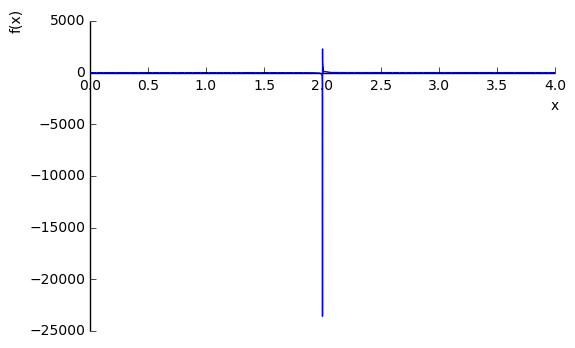

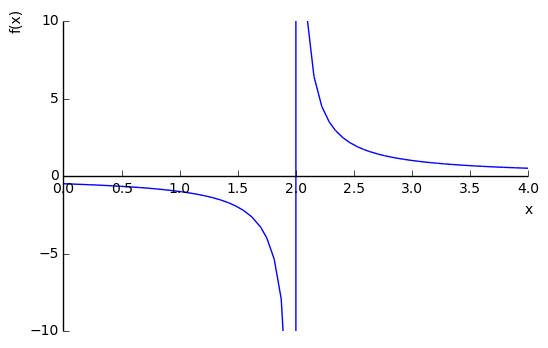

In [63]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
 
# Default value range of y axis is so big, it's hard to see the graph's shape
plot(1/(x - 2), (x, 0, 4))
 
# It limits the value range of y axis of the graph.
plot(1/(x - 2), (x, 0, 4), ylim=(-10, 10))

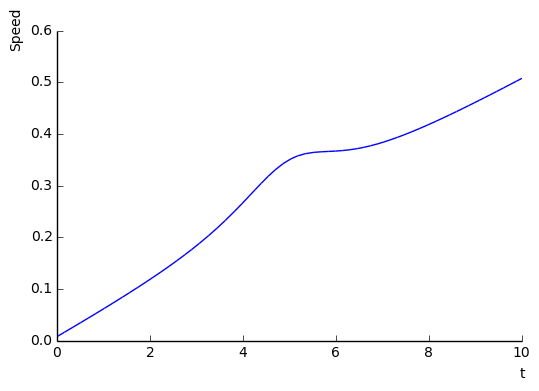

In [64]:
from sympy import symbols
from sympy import plot

t = symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)

plot(x, (t, 0, 10), ylabel='Speed')

In [83]:
s, t = symbols('s t', positive=True)

In [76]:
i, n,s, t, x = symbols('i n s t x')

In [77]:
summation(2**i, (i, 0, n - 1))

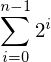

In [78]:
Sum(2**i, (i, 0, n - 1))

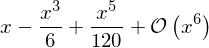

In [79]:
series(sin(x), x, 0, 6)

In [80]:
integrate(x**2, x)

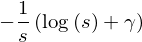

In [84]:
integrate(exp(-s*t)*log(t), (t, 0, oo)).simplify()

In [82]:
diff(sin(x)*exp(x), x)

In [ ]:
lambdify(t, x, modules=['numpy'])
y_vals = lam_x(x_vals)